## Hypothesis 
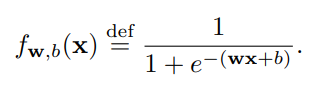

In [198]:
import numpy as np

@np.vectorize
def h(x, w, b):
    """
    Hypothesis function
    x: Input variable
    w: Weight
    b: Bias
    """
    e = 2.718281828459045235360
    return 1/(1 + e ** -(w * x + b))

## Maximum Likelihood
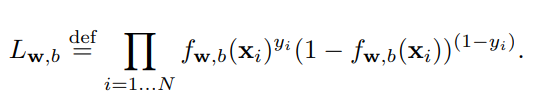

In [18]:
from itertools import product

def maximum_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 1
    for x, y in zip(X, Y):
        if y: 
            output *= h(x, w, b)
        else:
            output *= 1 - h(x, w, b)
    return output

def maximum_likelihood_alternative(X, Y, h, w, b):
    return product(h(x, w, b) ** y * (1-h(x, w, b)) ** (1-y) for x, y in zip(X, Y))

## Log-Likelihood
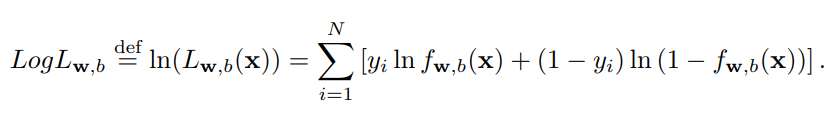

In [20]:
from numpy import log # log here is base e, and log10 is base 10

def log_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 0
    for x, y in zip(X, Y):
        if y: 
            output += log(h(x, w, b))
        else:
            output += log(1 - h(x, w, b))
    return output

def log_likelihood_alternative(X, Y, h, w, b):
    return sum(y * log(h(x, w, b)) + (1-y) * log(1-h(x, w, b)) for x, y in zip(X, Y))

## Gradient Descent

In [154]:
def gradient_descent(X, Y, h, w, b, num_iterations, alpha):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    num_iterations: The number of iterations
    alpha: Constant alpha
    """
    for _ in range(num_iterations):
        for x, y in zip(X, Y):
            temp = h(x, w, b) - y
            w -= alpha * temp * x
            b -= alpha * temp
    return w, b
            


In [209]:
m = 100
noise = 0

X = np.array(range(m), dtype="float64")
Y = np.array(list(x > m//2 for x in X))

X += np.random.rand(m) * noise

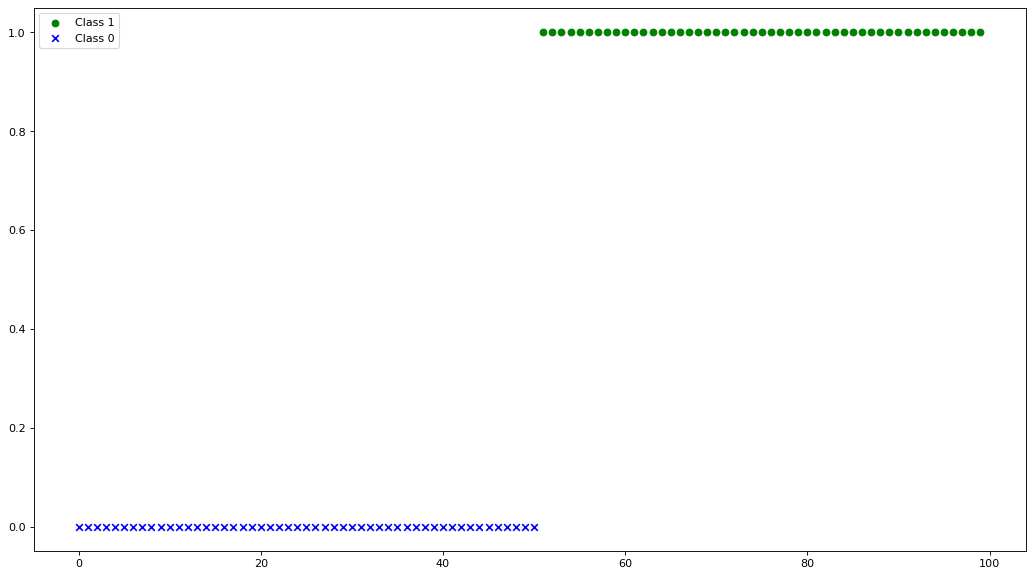

In [210]:
plt.style.use('seaborn-pastel') #sets the size of the charts
fig, ax = plt.subplots(1, figsize=(16, 9), dpi=80)

ax.scatter(X[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
ax.scatter(X[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

ax.legend()
plt.show()


In [212]:
w, b = gradient_descent(X, Y, h, 0.75, 0.5, 1000, 0.01)

In [213]:
w, b

(0.7351840511843364, -16.254984618851076)

In [214]:
h(100, w, b)

array(1.)

In [215]:
h(0, w, b)

array(8.72066972e-08)

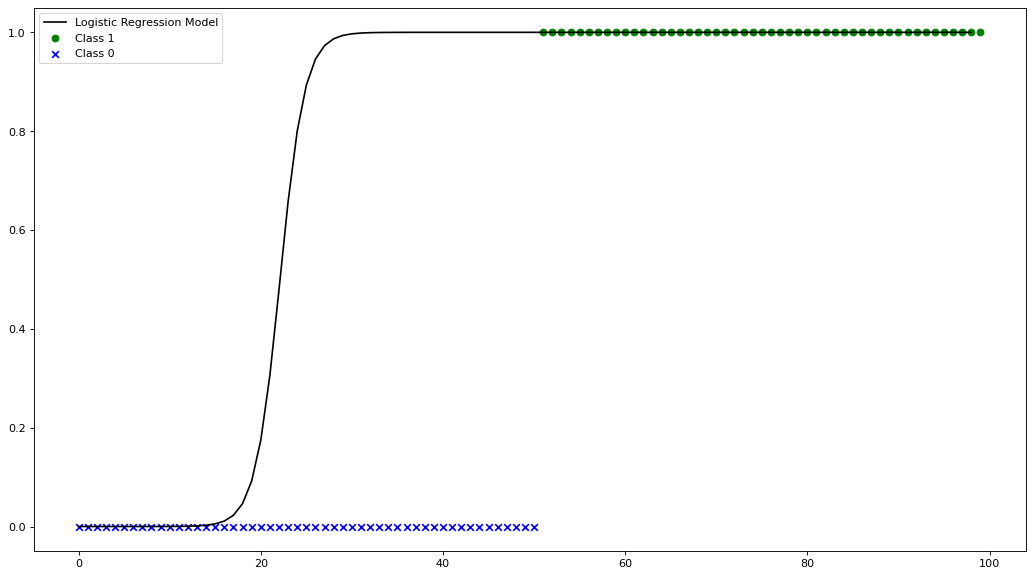

In [217]:
plt.style.use('seaborn-pastel') #sets the size of the charts
fig, ax = plt.subplots(1, figsize=(16, 9), dpi=80)

# Model (refactor later)
indices = np.array(range(int(min(X)), int(max(X))))
# indices = self.formatX(temp.reshape(temp.shape[0], 1)).reshape(temp.shape[0], n)
ax.plot(indices, h(indices, w, b), label="Logistic Regression Model", color='black')

# Sample
sample = X
ax.scatter(X[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
ax.scatter(X[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

ax.legend()
plt.show()
